## Logistic Regression

In this assignment we will work with a fictitious dataset. In this dataset, the admission of students is determined on the basis of two digits. The figures constitute the given input and the admission the final output. This is therefore a classification problem: on the basis of certain data (the figures) the students are divided into (in this case) two *classes* : admitted or non-admitted.

The steps we go through in each project are the following:

- Load the data
- Prepare the dataset
- Model the data
- Evaluate the results
- Plot and evaluate the learning curves

In the present case, the data has already been prepared for us, and for an accurate evaluation of our algorithm we do not yet have the right techniques. So we focus specifically on performing the logistic regression algorithm and displaying the result.

In [36]:
# needed packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pickle

## 1. Load the data

The given data can be found <a href="data/toelating.pkl"> here </a>. (data/toelating.pkl). This is again a pickle file, which allows you to load the data directly into numpy. Finish the cell below and run it to see what shape the matrix has loaded.

In [37]:
# YOUR CODE HERE
    
print(data.shape)

(100, 3)


As you can see, each line in the matrix has three values. The first two of these are the two digits and the last one indicates whether the student is admitted or not. Optionally use `data [1: 3,:]` or something similar to get an idea of the form of the data.

Like in the previous assignment, we will first plot the data. In this case, however, it is a bit more complex, because we also want to show the class to which the observation belongs. We want to show admitted students with a green dot and show unauthorized students with a red dot. To accomplish this, we must first filter the data. Use the `where` method from NumPy to get it together.

## 2. Inspect the data

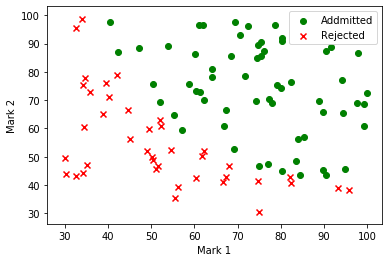

In [38]:
%matplotlib inline
# select twice the data
# data[:, 2] equal to 1 (admitted),
# data[:, 2] equal to 0 (not admitted)

# plot the data and add a legend

# YOUR CODE HERE


## 3. Prepare the data (without splitting)

In the following cell we extract the values from the variable `data`: we store the two digits in a matrix` X` and put the corresponding class (1 or 0) in the vector `y`. Then we add a row of ones to the matrix `X `so that we can perform the calculations vectorally. Finally, in the known way we set the variables `m` and` n`. The code is given; study what happens.

In [39]:
X,y = data[:,0:2], data[:, 2]
X = np.c_[np.ones(X.shape[0]), X]
m,n = X.shape
theta = np.zeros(n)
y = np.reshape(y, (m,1))

To be sure, we print out the dimensionality of the different variables:

In [40]:
print ("Shape X: {}".format(X.shape))
print ("Shape y: {}".format(y.shape))
print ("Shape theta: {}".format(theta.shape))

Shape X: (100, 3)
Shape y: (100, 1)
Shape theta: (3,)


As you can see, `theta` has an unexpected form:` (3,) `. We need to reshape this

In [41]:
print(np.reshape(theta, (3,1)).shape)

(3, 1)


## 4. Model - Sigmoid

As discussed during the lecture for classification problems we need the sigmoid function:

$$ g (z) = \frac {1} {1 + e ^ {- z}} $$

Implement the function in the cell below. Make it so that you can add both a number and a vector to it. In the first case, the function must return the sigmoid value of the number, in the second case it must return a vector containing the sigmoid value of each individual element in the input vector. You can use the numpy function `exp ()`. The cell below invokes this function with different values and different shapes. The expected results are included.

In [42]:
def sigmoid(z):
    # YOUR CODE HERE
    pass

To check the function create a plot

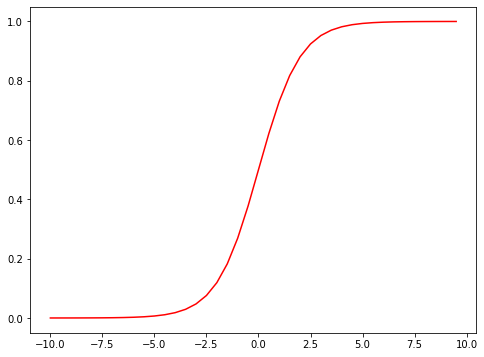

In [43]:
nums = np.arange(-10, 10, step=.5)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(nums, sigmoid(nums), 'r')

Now create the method `prediction` in the cell below. This method uses the `sigmoid` method you created above to predict the class given the current value of $ \ theta $. Because we use the sigmoid function, this prediction always produces a value between 0 and 1. The form we use for this is

$$ h _ {\theta} (x) = g (\theta ^ Tx) $$

In [44]:
def prediction(theta, X):
    # YOUR CODE HERE
    pass


prediction(theta, X[1:4, :])
# should return array([0.5, 0.5, 0.5])


array([0.5, 0.5, 0.5])

## 4. Model cost and gradient descent

Now implement the cost function for the logistic regression. During the theoretical part, it was discussed that this function is defined as follows:

$$ J (\theta) = - \frac {1} {m} \sum_ {i = 1} ^ m \left [y ^ {(i)} log (h_ \theta (x ^ {(i)}) ) + (1-y ^ {(i)}) log (1-h_ \theta (x ^ {(i)})) \right] $$


Use the `prediction` method you created above. In the cell, initial values of $ \ theta $ are set and the function `computeCost` is called. The corresponding values of $ J $ are shown here

In [45]:
def computeCost(theta, X, y):
    #Your code here


# test values voor theta
theta = np.array( ([-24, 0.2, 0.2]))
J = computeCost(theta, X, y)
print("value of J with given non zero values: {:.4f}".format(J))
print ("This should be around 0.22\n")

theta = np.zeros(n)
J = computeCost(theta, X, y)
print("cost J with all zeros: {:.4f}".format(J))
print ("This should be around 0.69.")

value of J with given non zero values: 0.2183
This should be around 0.22

cost J with all zeros: 0.6931
This should be around 0.69.


For the regression, we need to know what the derivative is for a specific point on the cost function. By using this derivative (the *gradient*) we can determine which "side" the values of $ \theta $ must go to to get closer to the zero point. As discussed, the derivative of the cost function is


$$ \theta_j: = \theta_j - \frac {1} {m} \sum_ {i = 1} ^ {m} (h_ \theta (x ^ {(i)}) - y ^ {(i)}) x ^ {(i)} _ j $$

This is indeed the same as that for linear regression; the only difference is that the value of $ h _ {\theta} (x) $ is calculated differently here.

Complete the `gradient` method below. When you are done with this, this method is called from this cell. The result can be interpreted as the *direction* that the different dimensions (the values in `X`) must go in to get closer to the zero point.

In [46]:
def gradient(theta, X, y):
    #Your code here


# Performing one step in the gradient ...

gradient (theta, X, y)

# should result
# array ([[-0.1, -12.00921659, -11.26284221]])

array([[ -0.1       , -12.00921659, -11.26284221]])

##  Logistic regression using gradient descent

In the `gradient` method we made above, we do not really perform the regression - we only take one step towards the minimum. We can program that regression all by ourselves, but it is easier to use the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html"> method fmin_tnc from SciPy </a>. This method has a number of parameters that indicate how the minimum can be reached:

- `func`: the method that indicates the cost of the current iteration
- `x0`: the initial values of the 'weights'
- `fprime`: the function that indicates how to adjust the different weights to get closer to the zero point
- `args`: a tuple of the arguments you throw in the different functions (X, y)

You can simply call the `opt.fmin_tnc` method in the cell below - the package has already been imported above. The method returns new values for the weights. Put these new values in the variable `result`.

In [47]:
result = None # replace with call opt.fmin_tnc
print (result)


# should have result like this 
# (array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)
# exact values might differ

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)


## 5. Results

Below we retrieve the results of the minimization and store them in `theta_res` (of 'result') and see what the cost of the new value is. Then we plot the data again, but now with the * decision boundary *.

In [48]:
theta_res = result[0]
computeCost(theta_res, X, y)

0.20349770158947483

The cost was 0.69, so this is a whole improvement over the one theta with only zeros.

In [49]:
# draw decision boundary
plot_x = np.array( ([np.min(X[:,1]-2), np.max(X[:,1]+2)]) )
plot_y = -1/theta_res[2] * (theta_res[1] * plot_x + theta_res[0])

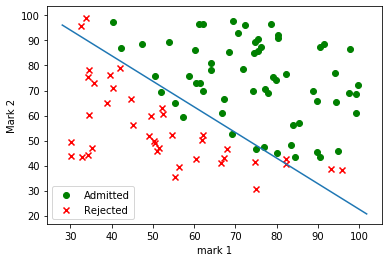

In [50]:
d1 = data[np.where(data[:, 2]==1)]
d2 = data[np.where(data[:, 2]==0)]

x1,y1 = d1[:, 0:2].T
x2,y2 = d2[:, 0:2].T

plt.scatter(x1,y1, c='g', label='Admitted', marker='o')
plt.scatter(x2,y2, c='r', label="Rejected", marker='x')
plt.plot(plot_x, plot_y) 
plt.ylabel('Mark 2')
plt.xlabel('mark 1') 
plt.legend()
plt.show()